<a href="https://colab.research.google.com/github/sanyakapoor27/AIMLMonth2023/blob/main/Classification_BreaKHis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this colab file, we have built a classification model for Breast Cancer into benign and malignant categories using VGG16 as our classifier.
First, we start by installing tensorflow and importing the necessary packages and libraries.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.9 MB/s eta 0:00:00


In [ ]:
#importing necessary packages
import os
import tensorflow as tf
import numpy as np
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import shutil
import hashlib
from hashlib import md5
import imageio.v2 as imageio
from imageio import imread
import pandas as pd
from keras.utils import img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import visualkeras

In [ ]:
#setting gpu memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#downloading kaggle.json file
!gdown "https://drive.google.com/uc?id=1UvRuiTaifBWLHnueH8z4Bj5gihcaxmiM"

Downloading...
From: https://drive.google.com/uc?id=1UvRuiTaifBWLHnueH8z4Bj5gihcaxmiM
To: /content/kaggle.json
100% 70.0/70.0 [00:00<00:00, 427kB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#downloading dataset from kaggle
!kaggle datasets download -d forderation/breakhis-400x

 99% 793M/803M [00:08<00:00, 93.8MB/s]
100% 803M/803M [00:08<00:00, 97.6MB/s]


In [ ]:
#unzipping
!unzip breakhis-400x.zip

Archive:  breakhis-400x.zip
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreaKHis 400X/test/beni

# Exploratory Data Analysis

In this section, we will explore our image dataset by looking at the different classes we have, the total number of images and finding duplicated images in the dataset.

In [ ]:
#function to move images from the folders

def move_images(datadir, dest):
  for imgs in os.listdir(datadir):
    source = (os.path.join(datadir, imgs))
    shutil.move(source,dest)

In [ ]:
move_images("/content/BreaKHis 400X/test/benign", "/content/BreaKHis 400X/train/benign")
move_images("/content/BreaKHis 400X/test/malignant", "/content/BreaKHis 400X/train/malignant")

In [ ]:
data_dir = "/content/BreaKHis 400X/train"

In [ ]:
print("The two classes inside this dataset are: ")
for image_class in os.listdir(data_dir):
  print(image_class)

The two classes inside this dataset are: 
benign
malignant


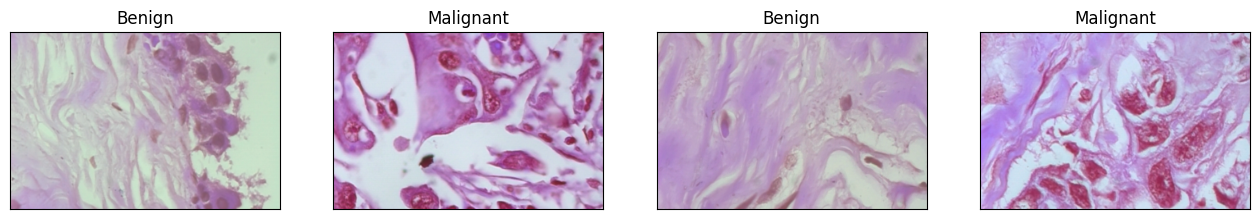

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(141)
image1 =cv2.imread("/content/BreaKHis 400X/train/benign/SOB_B_A-14-22549AB-400-001.png")
plt.imshow(image1)
plt.title("Benign")
plt.xticks([])
plt.yticks([])
plt.subplot(142)
image2 = cv2.imread("/content/BreaKHis 400X/train/malignant/SOB_M_DC-14-10926-400-002.png")
plt.imshow(image2)
plt.title("Malignant")
plt.xticks([])
plt.yticks([])
plt.subplot(143)
image3 = cv2.imread("/content/BreaKHis 400X/train/benign/SOB_B_A-14-22549AB-400-002.png")
plt.imshow(image3)
plt.title("Benign")
plt.xticks([])
plt.yticks([])
plt.subplot(144)
image4 = cv2.imread("/content/BreaKHis 400X/train/malignant/SOB_M_DC-14-10926-400-003.png")
plt.imshow(image4)
plt.title("Malignant")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
malignant_dir = "/content/BreaKHis 400X/train/malignant"
benign_dir = "/content/BreaKHis 400X/train/benign"

In [ ]:
#the number of images inside the folders

m_count = len(os.listdir(malignant_dir))
b_count = len(os.listdir(benign_dir))
print("The total number of benign images: " + str(b_count))
print ("The total number of malignant images: " + str(m_count))

The total number of benign images: 547
The total number of malignant images: 1146


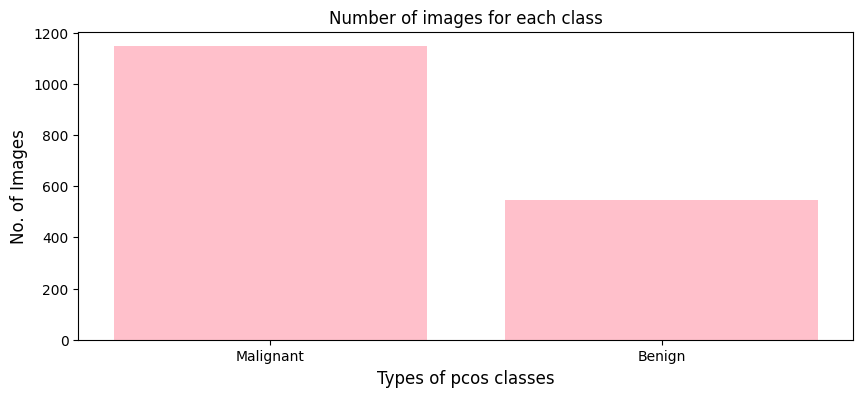

In [ ]:
#showing a visual representation
x_axis = ['Malignant', 'Benign']
y_axis = [int(m_count), int(b_count)]

fig = plt.figure(figsize=(10, 4))
plt.bar(x_axis, y_axis, color='pink')
plt.title('Number of images for each class')
plt.xlabel('Types of pcos classes', fontsize=12)
plt.ylabel('No. of Images', fontsize=12)
plt.show()

We've created a function to find the hash value of an image using the md5 algorithm. Duplicates can lead to biases during training therefore, it is important to remove them. We do this by saving the index of every unique hash value in a dictionary and when found to be repeated they get appended in a list with the index of the orignal hash value.

In [ ]:
#function to give the hash value of an image
def image_hash(imagepath):
  with open(imagepath, 'rb') as f:
    return md5(f.read()).hexdigest()

In [ ]:
#function to find duplicates of an image by its hash value

def find_duplicates(dir_name):
  #empty list to store index of duplicate images
  duplicates =[]

  #empty dictionary to save index of non duplicated images
  hash_keys = {}

  for index, imgfile in enumerate(os.listdir(dir_name)):
    imagepath = (os.path.join(dir_name, imgfile))
    filehash = image_hash(imagepath)
    if filehash not in hash_keys:
      hash_keys[filehash] = index
    else:
      #if same hash value is found it is added in the list
      duplicates.append((index, hash_keys[filehash]))

  return duplicates

In [ ]:
m_duplicates = find_duplicates(malignant_dir)
print(m_duplicates)
print()
print("The total number of duplicate images for Malignant Cancer are: " + str(len(m_duplicates)))

[]

The total number of duplicate images for Malignant Cancer are: 0


In [ ]:
b_duplicates = find_duplicates(benign_dir)
print(b_duplicates)
print()
print("The total number of duplicate images for Benign Cancer are: " + str(len(b_duplicates)))

[]

The total number of duplicate images for Benign Cancer are: 0


In [ ]:
os.chdir("/content/")

# Pre-processing

Here, we resize the images and save the as numpy arrays.

In [ ]:
def preprocessing(dir_name):

  labels = {}
  preprocessed_labels = []
  preprocessed_image = []
  i = 0

  for image_class in os.listdir(dir_name):
    labels[i] = image_class
    for img in os.listdir(os.path.join(dir_name, image_class)):
      path = os.path.join(dir_name, image_class, img)

      image = cv2.imread(path)
      image = cv2.resize(image, (224, 224))

      preprocessed_image.append(image)
      preprocessed_labels.append(i)

    i+=1

  preprocessed_image = np.array(preprocessed_image)
  preprocessed_labels = np.array(preprocessed_labels)
  print("Preprocessing is complete!")
  return preprocessed_image, preprocessed_labels, labels

In [ ]:
#applying the preprocessing function on our data directory and then saving them
x, y, labels = preprocessing(data_dir)

Preprocessing is complete!


In [ ]:
labels

{0: 'benign', 1: 'malignant'}

# Train-Test Split

We've split the data into a ratio of 80:20 for training and testing respectively. Separate folders for train and test are created and images are divided following the above mentioned ratio.

In [ ]:
#splitting our preprocessed images in 80:20 for training and testing respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#making train and test folders

!apt-get install tree

%mkdir train test train/benign train/malignant test/benign test/malignant
!tree -d

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.6 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
.
├── BreaKHis 400X
│   ├── test
│   │   ├── benign
│   │   └── malignant
│   └── train
│       ├── benign
│       └── malignant
├── sample_data
├── test
│   ├── benign
│   └── malignant
└── train
    ├── benign
    └── malignant

14 directories


In [ ]:
train_dir = "/content/train"
test_dir = "/content/test"

In [ ]:
#function to save images to directory

def save_images(x_set, y_set, dir):
  i = 0
  for (img, imgclass) in zip(x_set, y_set):
    if imgclass == 0:
      cv2.imwrite(os.path.join(dir, 'benign', str(i) + '.jpg' ), img)
    else:
      cv2.imwrite(os.path.join(dir, 'malignant', str(i) + '.jpg'), img)
    i+=1
  print("Images successfully saved!")

In [ ]:
save_images(x_train, y_train, train_dir)
save_images(x_test, y_test, test_dir)

Images successfully saved!
Images successfully saved!


In [ ]:
print("Number of benign images in train: " + str(len(os.listdir(os.path.join('train', 'benign')))))
print("Number of malignant images in train: " + str(len(os.listdir(os.path.join('train', 'malignant')))))
print()
print("Number of benign images in test: " + str(len(os.listdir(os.path.join('test', 'benign')))))
print("Number of malignant images in test: " + str(len(os.listdir(os.path.join('test', 'malignant')))))

Number of benign images in train: 424
Number of malignant images in train: 930

Number of benign images in test: 123
Number of malignant images in test: 216


# Data Augmentation

Data Augmentation helps us to diversify the data we feed the training model. We've used the ImageDataGenerator class from Keras for our training directory and applied the following augmentations to our training data such as rotation, flipping, width shift etc.

In [ ]:
#listing the augmentations to be applied to training images using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale = 1./255,
    brightness_range=[0.3, 0.2],
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle =True,
    seed=42,
)

Found 1354 images belonging to 2 classes.


In [ ]:
#using ImageDataGenerator class for test images (only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle =False,
    seed=42,
)

Found 339 images belonging to 2 classes.


In [ ]:
#for visualizing
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.2,
    brightness_range=[0.3, 0.4],
    horizontal_flip=True,
)

In [ ]:
os.mkdir('preview')

In [ ]:
#for visualizing
x_demo = x_train[0]
x_demo = np.array(x_demo).reshape(1,224, 224, 3)

i = 0
for batch in demo_datagen.flow(x_demo, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='png'):
    i += 1
    if i > 20:
        break

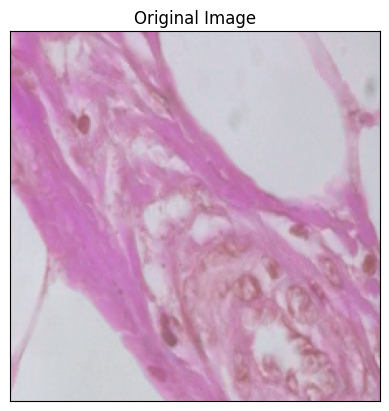

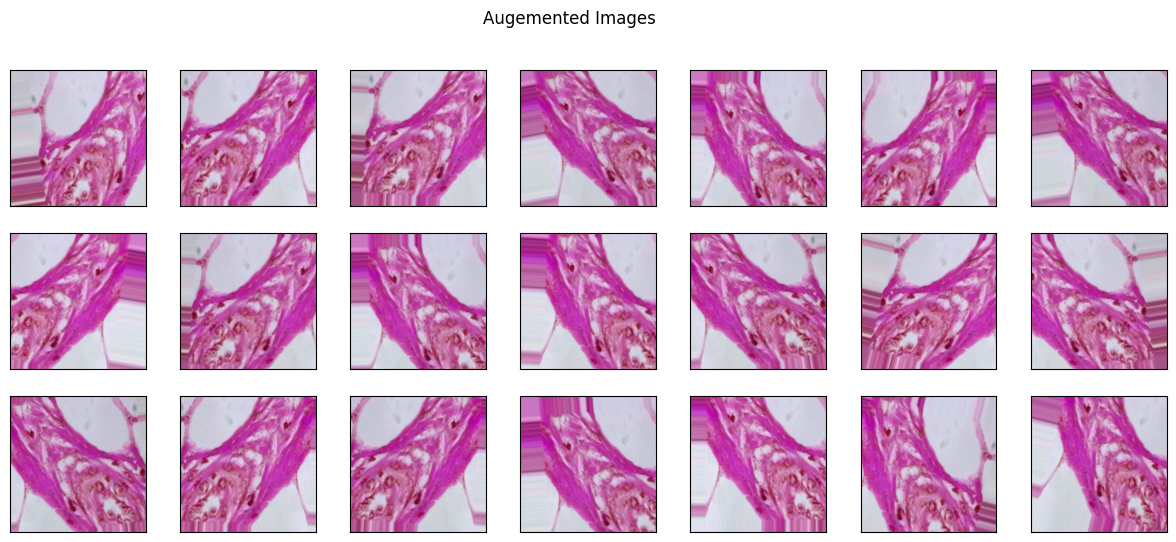

In [ ]:
#showing the orignal and augmented images
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

# VGG 16

In classification of our images we've applied the approach of Transfer Learning. We've imported the VGG16 model from Keras and assigned it ImageNet pre-trained weights.

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
#imported VGG16 with ImageNet weights
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

m = Flatten()(VGG_model.output)
m = Dense(128, activation="relu")(m)
m = Dropout(0.5)(m)
output = Dense(1, activation="sigmoid")(m)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=VGG_model.input, outputs=output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

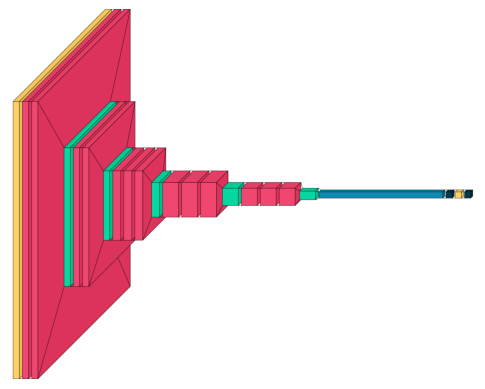

In [ ]:
model_show = visualkeras.layered_view(model)
plt.axis('off')
plt.imshow(model_show)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.fit(train_generator, epochs=100)

Epoch 1/100
43/43 [==============================] - 51s 605ms/step - loss: 0.6703 - accuracy: 0.6654
Epoch 2/100
43/43 [==============================] - 24s 562ms/step - loss: 0.6265 - accuracy: 0.6861
Epoch 3/100
43/43 [==============================] - 25s 575ms/step - loss: 0.5615 - accuracy: 0.7393
Epoch 4/100
43/43 [==============================] - 24s 559ms/step - loss: 0.6101 - accuracy: 0.7083
Epoch 5/100
43/43 [==============================] - 24s 564ms/step - loss: 0.5604 - accuracy: 0.7452
Epoch 6/100
43/43 [==============================] - 25s 587ms/step - loss: 0.4916 - accuracy: 0.8043
Epoch 7/100
43/43 [==============================] - 24s 564ms/step - loss: 0.4450 - accuracy: 0.8301
Epoch 8/100
43/43 [==============================] - 24s 564ms/step - loss: 0.4607 - accuracy: 0.8205
Epoch 9/100
43/43 [==============================] - 25s 566ms/step - loss: 0.5971 - accuracy: 0.6972
Epoch 10/100
43/43 [==============================] - 25s 569ms/step - loss: 0.490

In [ ]:
#predicting
predictions = model.predict(test_generator)

339/339 [==============================] - 7s 19ms/step


In [ ]:
test_labels = test_generator.classes

In [ ]:
predictions_bin = (predictions > 0.5)
cf = classification_report(test_labels, predictions_bin)
print(cf)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       123
           1       0.94      0.94      0.94       216

    accuracy                           0.92       339
   macro avg       0.92      0.92      0.92       339
weighted avg       0.92      0.92      0.92       339

